In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime as dt

In [2]:
states_hpi = pd.read_csv("Resources/StateHPIByYear.csv")

states_hpi

,Unnamed: 0,State,Year,HPI
0,0,California,1996,330.618545
1,1,California,1997,338.655091
2,2,California,1998,355.755536
3,3,California,1999,376.622500
4,4,California,2000,439.172182
...,...,...,...,...
63,68,Illinois,2015,211.142474
64,69,Illinois,2016,215.586082
65,70,Illinois,2017,220.249474
66,71,Illinois,2018,223.666000


In [4]:
ca = states_hpi.loc[states_hpi["State"] == "California"].copy()
fl = states_hpi.loc[states_hpi["State"] == "Florida"].copy()
il = states_hpi.loc[states_hpi["State"] == "Illinois"].copy()

ca = ca[["State", "Year", "HPI"]]
fl = fl[["State", "Year", "HPI"]]
il = il[["State", "Year", "HPI"]]

,State,Year,HPI
44,Illinois,1996,164.556386
45,Illinois,1997,170.086627
46,Illinois,1998,170.318864
47,Illinois,1999,175.569318
48,Illinois,2000,182.080114
49,Illinois,2001,185.640870
50,Illinois,2002,187.808000
51,Illinois,2003,191.535158
52,Illinois,2004,200.566316
53,Illinois,2005,212.492947


In [5]:
ca_df = ca.groupby("Year").sum()
il_df = il.groupby("Year").sum()
fl_df = fl.groupby("Year").sum()

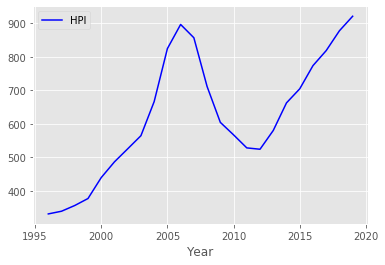

In [6]:
register_matplotlib_converters()
plt.style.use("ggplot")

ca_df.plot(color=["Blue"])

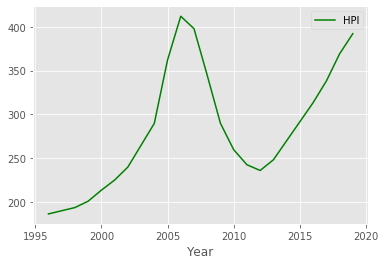

In [7]:
register_matplotlib_converters()
plt.style.use("ggplot")

fl_df.plot(color=["Green"])

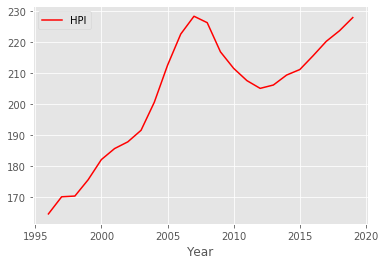

In [8]:
register_matplotlib_converters()
plt.style.use("ggplot")

il_df.plot(color=["Red"])

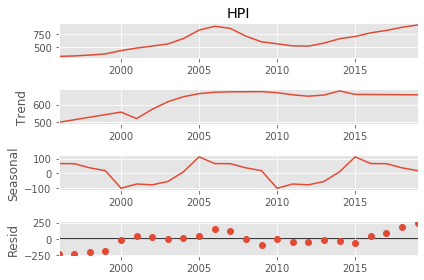

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ca_df["HPI"], model='additive', extrapolate_trend='freq', period=10)
fig = result.plot()

In [10]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
train_df = ca_df.rename(columns={"HPI": "y"})
train_df
train_df["ds"] = train_df.index
train_df
model.fit(train_df)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


HPI vs. Date Forecast for California 1996-2119


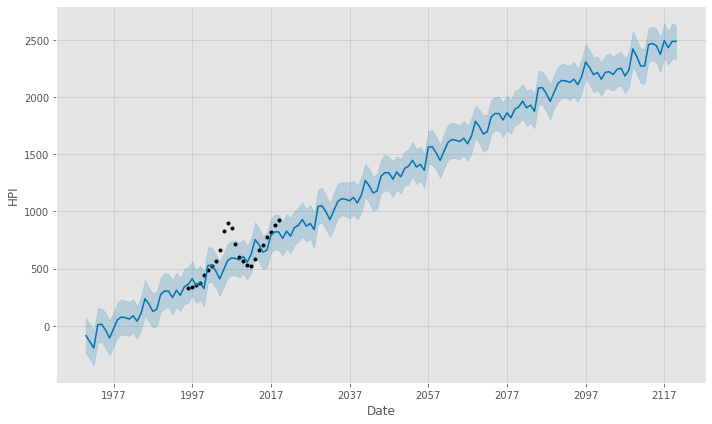

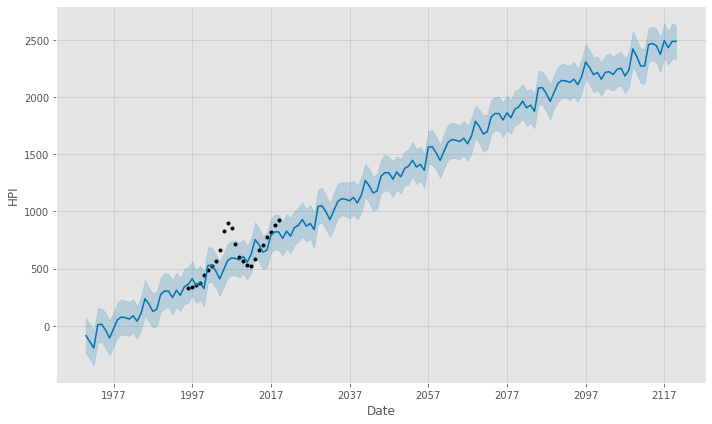

In [12]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 30 years
future = model.make_future_dataframe(150, freq= 'Y')
forecast = model.predict(future)

ca_predict = forecast[["ds", "yhat"]]

print("HPI vs. Date Forecast for California 1996-2119")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="HPI")

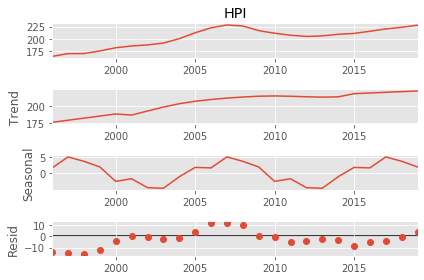

In [13]:
# Illinois HPI Data
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(il_df["HPI"], model='additive', extrapolate_trend='freq', period=10)
fig = result.plot()

In [16]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
train_df = il_df.rename(columns={"HPI": "y"})
train_df
train_df["ds"] = train_df.index
train_df
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


HPI vs. Date Forecast for California 1996-2119


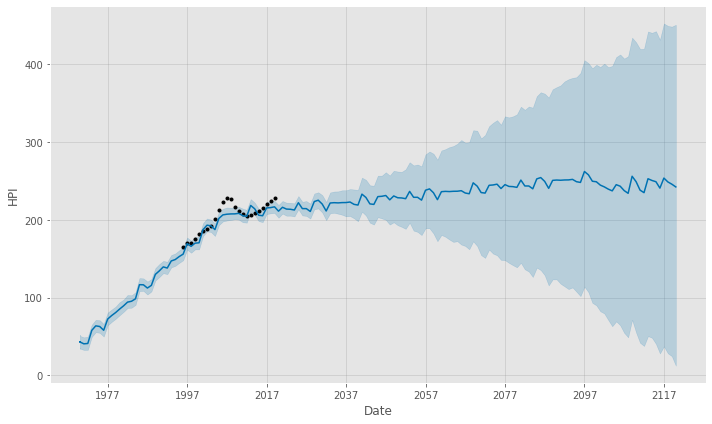

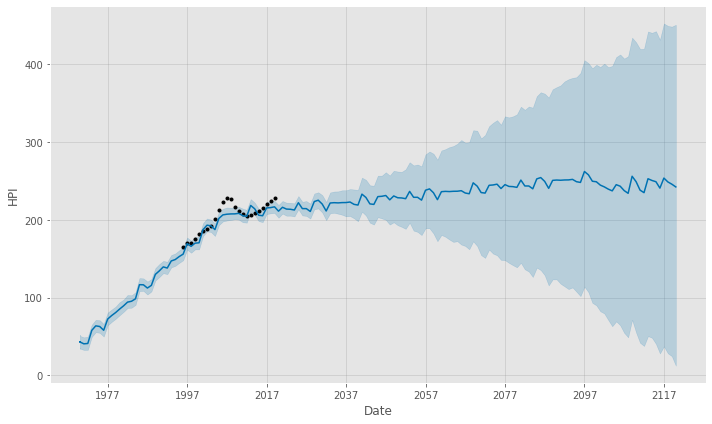

In [17]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 30 years
future = model.make_future_dataframe(150, freq= 'Y')
forecast = model.predict(future)

il_predict = forecast[["ds", "yhat"]]

print("HPI vs. Date Forecast for California 1996-2119")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="HPI")

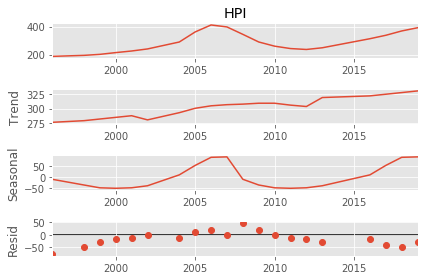

In [18]:
# Florida Disaster Data
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(fl_df["HPI"], model='additive', extrapolate_trend='freq', period=10)
fig = result.plot()

In [19]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
train_df = fl_df.rename(columns={"HPI": "y"})
train_df
train_df["ds"] = train_df.index
train_df
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


HPI vs. Date Forecast for California 1996-2119


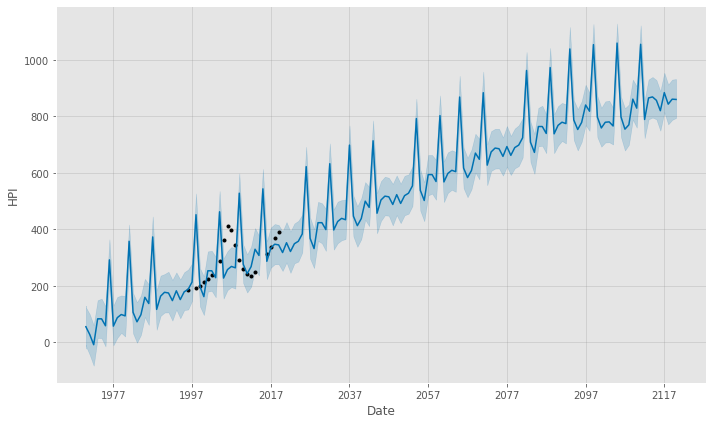

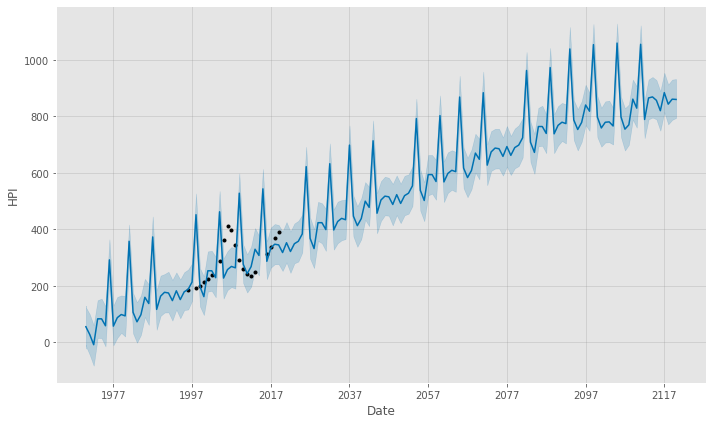

In [20]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 150 years
future = model.make_future_dataframe(150, freq= 'Y')
forecast = model.predict(future)

fl_predict = forecast[["ds", "yhat"]]

print("HPI vs. Date Forecast for California 1996-2119")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="HPI")

In [21]:
ca_predict["State"] = "California"
il_predict["State"] = "Illinois"
fl_predict["State"] = "Florida"

frames = [ca_predict, fl_predict, il_predict]

hpi_predict= pd.concat(frames)

hpi_predict["ds"] = pd.to_datetime(hpi_predict["ds"], format="%Y-%m-%d")
hpi_predict["Year"] = hpi_predict["ds"].dt.strftime("%Y").astype(int)

C:\Users\cbere\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
hpi_predict = hpi_predict.loc[hpi_predict["Year"] >= 1996]

hpi_predict = hpi_predict[["yhat", "Year", "State"]]
hpi_predict = hpi_predict.rename(columns={"yhat": "HPI (Predicted)"})

In [23]:
hpi_predict.to_csv("Resources/StateHPIByYearPredicted.csv")